<h1>Importing the Libraries</h1>

In [1]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import tensorflow as tf
import keras
#import theano as th
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

Using TensorFlow backend.


In [2]:
from patsy import dmatrices
from sklearn import datasets, svm
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess

## Version Check

In [3]:
print("matplotlib: {}".format(mpl.__version__))
print("sklearn: {}".format(sklearn.__version__))
print("scipy: {}".format(scipy.__version__))
print("seaborn: {}".format(sns.__version__))
print("numpy: {}".format(numpy.__version__))
print("pandas: {}".format(pd.__version__))
print("Python: {}".format(sys.version))

matplotlib: 3.0.2
sklearn: 0.20.1
scipy: 1.1.0
seaborn: 0.9.0
numpy: 1.15.4
pandas: 0.23.4
Python: 3.6.7 |Anaconda, Inc.| (default, Dec 10 2018, 20:35:02) [MSC v.1915 64 bit (AMD64)]


## Setup
Few adjustments for Code Readability

In [4]:
sns.set(style='white',context='notebook',palette='deep')
pylab.rcParams['figure.figsize'] =  12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

## Exploratory Data Analysis(EDA)

-  Which variables suggest interesting relationships?
-  Which observations are unusual?
-  Analysis of Features!

This can be answered by following the steps of EDA

-  Data Collection
-  Data Visualization
-  Data Preprocessing
-  Data Cleaning

### STEP 1: Data Collection
Data collection is the process of gathering and measuring the data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate teh outcomes of the particular collection. Here collection of the dataset can be done using the pandas dataframe.

In [102]:
# import training and testing data to play with it
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

-  Each <b> row </b> is an observation(also known as: sample, example, instance, record).<br>
-  Each column is a <b> feature </b> (also known as: attribute, Independent variable, input regressor, covariate).

In [40]:
print("Type of df_train {}".format(type(df_train)))
print("Type of df_test {}".format(type(df_test)))

Type of df_train <class 'pandas.core.frame.DataFrame'>
Type of df_test <class 'pandas.core.frame.DataFrame'>


### STEP 2: Data Visualization

<b> Data Visualization </b> is the presentation in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.<br>

With interactive visualizations, you can take teh concept a step further by using the technology to drill down into charts and graphs for more detail, interactively changing what data one sees and how it's processed.

The 11 plots analyzed here are as follows:
-  Scatter Plots
-  Box Plots
-  Histogram
-  Multivariate Plots
-  Violin Plots
-  Pair Plots
-  Kde(Kernel Density Estimate) Plot
-  Heat maps
-  Andrew Curves
-  Radviz Plots
-  Joint Plots

#### 2.1 Scatter Plot
The purpose of Scatter plot is to identify the type of relationship (if any) between two quantitative variables.

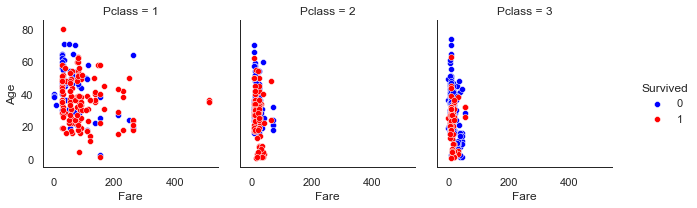

In [7]:
# Using the Pclass 1 = Upper, 2 = Middle, 3 = Lower to get how fare and age is related
g = sns.FacetGrid(df_train,hue="Survived",col="Pclass",margin_titles=True,
                 palette={1:"Red",0:"Blue"})
g = g.map(plt.scatter,"Fare","Age",edgecolor="w").add_legend()

#### 2.2 Box Plot
The Box plots are a method for graphically depicting the groups of  numerical data through quartiles. Box plots may also have lines extending from the boxes and are known as whiskers indicating the range from the minimum to the maximum value outside the upper and lower quartiles, hence the name.

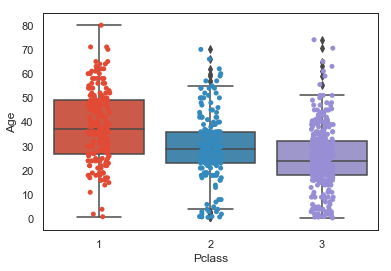

In [8]:
ax = sns.boxplot(x="Pclass",y="Age",data=df_train)
ax = sns.stripplot(x="Pclass",y="Age",data=df_train,jitter=True,edgecolor="gray")
plt.show()

#### 2.3 Histograms
They give the count of the values in bins for each numeric feature.

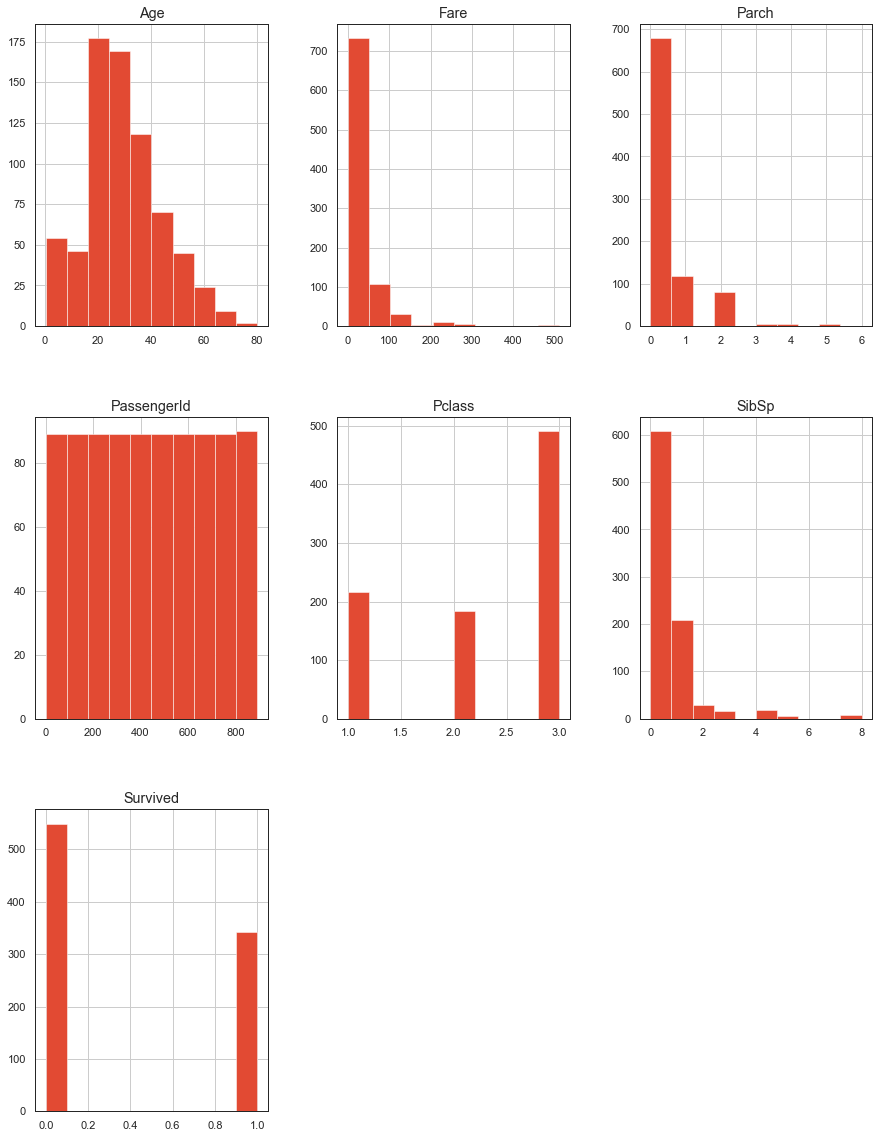

<Figure size 432x288 with 0 Axes>

In [9]:
_ = df_train.hist(figsize=(15,20))
_ = plt.figure()

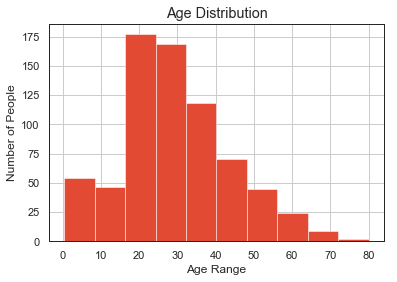

In [10]:
df_train["Age"].hist()
_ = plt.title('Age Distribution')
_ = plt.xlabel('Age Range')
_ = plt.ylabel('Number of People')

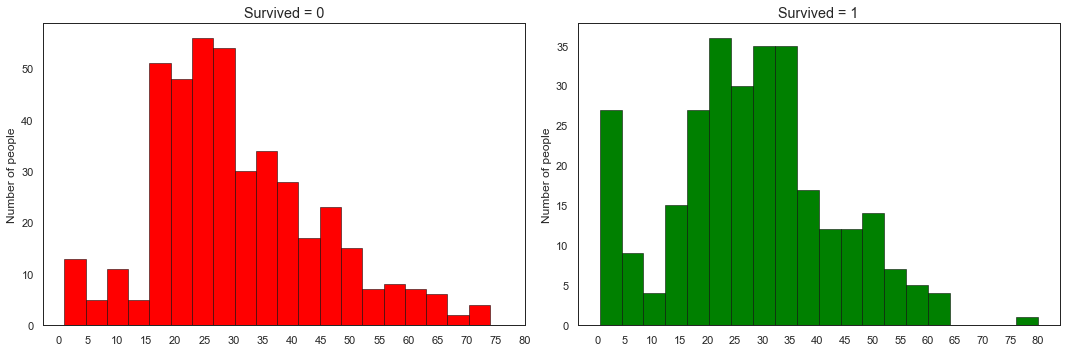

In [11]:
plt.figure(1,figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
df_train[df_train['Survived']==0].Age.plot.hist(bins=20,edgecolor='black',color='red')
_ = plt.title('Survived = 0')
_ = plt.xticks(list(range(0,85,5)))
_ = plt.ylabel('Number of people')

plt.subplot2grid((1,2),(0,1))
df_train[df_train['Survived']==1].Age.plot.hist(bins=20,edgecolor='black',color='green')
_ = plt.title('Survived = 1')
_ = plt.xticks(list(range(0,85,5)))
_ = plt.ylabel('Number of people')

plt.tight_layout()

##### BONUS PIE PLOTS

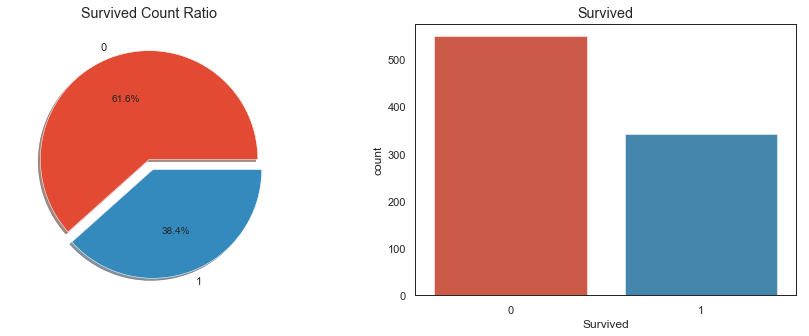

In [12]:
plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
_ = df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
_ = plt.title('Survived Count Ratio')
_ = plt.ylabel('')
plt.subplot2grid((1,2),(0,1))
sns.countplot('Survived',data=df_train)
_ = plt.title('Survived')

### DATA PREPARATION

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Taking care of Missing values
The features Ticket and the cabin have missing values and so can't add much value to the analysis fromthe dataframe to preserve the integrity of the dataset.

We remove the whole of 'ticket' and 'cabin' feature entries.

In [103]:
df_train = df_train.drop(['Ticket','Cabin'],axis=1) # removes the 2 feature columns

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


As can be seen, the 2 columns are removed and this gives a 10 column dataframe. Now, to remove the NaN values from Age feature, which is nominal in requirement we can use the dropna() method of the pandas library.

In [105]:
df_train = df_train.dropna()

### Let's take a look at our data graphically:

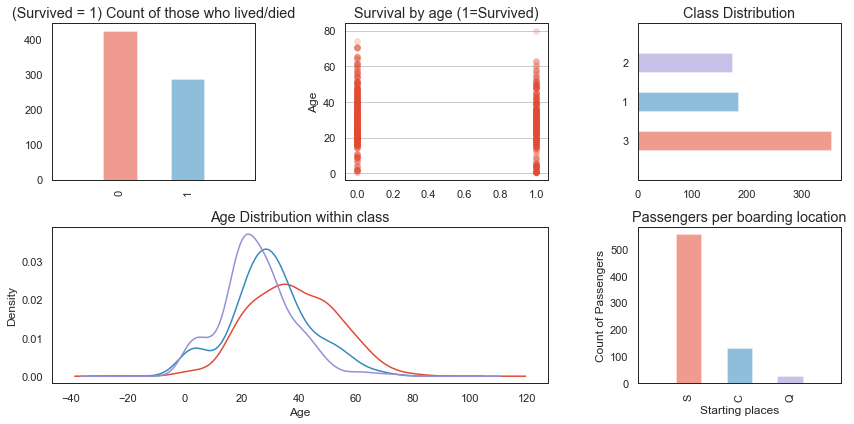

In [17]:
# Parameters for the graph
#set the figure
plt.figure(figsize=(12,6))

#alpha values
alpha_scatterplot = 0.2
alpha_bargraph = 0.55

#Plot different graphs together in a single go tight layout
plt.subplot2grid((2,3),(0,0))
#Plot a bar graph of those who survived and those who did not(count plot)
df_train.Survived.value_counts().plot(kind='bar',alpha=alpha_bargraph)
#Set X-axis limit
plt.xlim(-1,2)
#Title for the Graph
plt.title('(Survived = 1) Count of those who lived/died')

#Plot the second graph
plt.subplot2grid((2,3),(0,1))
#Scatter Plot Survival by age with alpha_Scatterplot
plt.scatter(df_train.Survived,df_train.Age,alpha=alpha_scatterplot)
#Set y-label
plt.ylabel('Age')
#Format the gridline sthyle for the graphs
plt.grid(b=True,which='major',axis='y')
plt.title("Survival by age (1=Survived)")

#Plot the Third Graph
plt.subplot2grid((2,3),(0,2))
#Class distribution
df_train.Pclass.value_counts().plot(kind='barh',alpha=alpha_bargraph)
#Set title
plt.title('Class Distribution')
#Set y-limit
plt.ylim(-1,len(df_train.Pclass.value_counts()))

#Plot the Fourth Graph(KDE plot)
plt.subplot2grid((2,3),(1,0),colspan=2)
#Plot the kernel density estimate of the subset of the 1st class passenger's age
df_train.Age[df_train.Pclass==1].plot(kind='kde')
df_train.Age[df_train.Pclass==2].plot(kind='kde')
df_train.Age[df_train.Pclass==3].plot(kind='kde')

#Set axis labels & title
plt.xlabel('Age');plt.ylabel('Density');plt.title('Age Distribution within class')

#Plot the Fifth Graph(Bar Graph)
plt.subplot2grid((2,3),(1,2))
#Plot the count of passengers per boarding location
df_train.Embarked.value_counts().plot(kind='bar',alpha=alpha_bargraph)

#Set xlimit, ylimit
plt.xlim(-1,len(df_train.Embarked.value_counts())); plt.ylim()

#Set xlabel, ylabel, title
plt.xlabel('Starting places'); plt.ylabel('Count of Passengers'); plt.title('Passengers per boarding location')

#Beautiful layout
_ = plt.tight_layout()

### Analyzing the Survival/Death Count relationship with other features
The First step is to see the number of people who survived vs the number of people who lived.

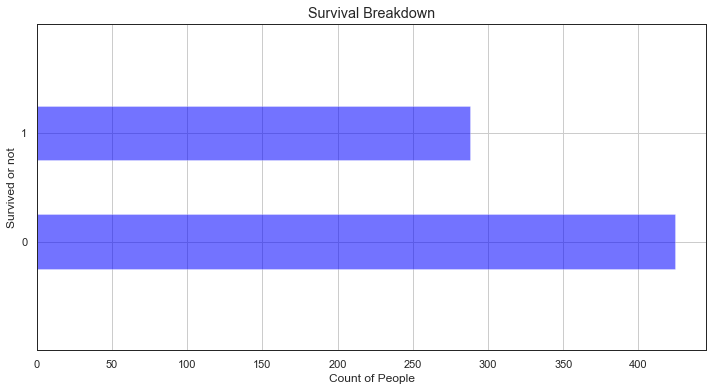

In [18]:
#Set figure
plt.figure(figsize=(12,6))
#Plot
df_train.Survived.value_counts().plot(kind='barh',color='blue',alpha=0.55)
#Set xlimit,ylim
plt.xlim();plt.ylim(-1,len(df_train.Survived.value_counts()))
#Set xlabel,ylabel,title
plt.xlabel('Count of People');plt.ylabel('Survived or not',rotation=90);_ = plt.title('Survival Breakdown')
#Set gridlines
plt.grid(b=True)

### Let's add more sauce!
#### Breaking the Survival count by Gender

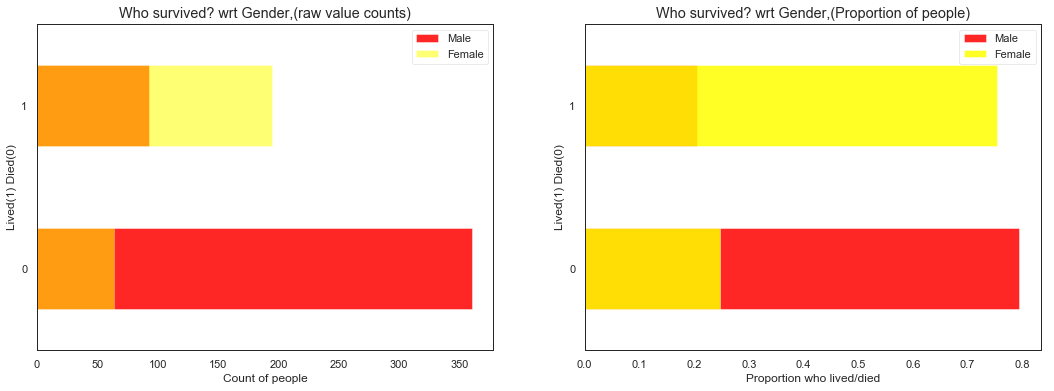

In [19]:
fig = plt.figure(figsize=(18,6))

#Creating the variables for the plot
df_male = df_train.Survived[df_train.Sex=='male'].value_counts().sort_index()
df_female = df_train.Survived[df_train.Sex=='female'].value_counts().sort_index()

#Plot the First Graph(Raw value counts)
fig.add_subplot(121)
df_male.plot(kind='barh',label='Male',color='red',alpha=0.85)
df_female.plot(kind='barh',label='Female',color='yellow',alpha=0.55)
#Set xlim,ylim
plt.ylim();plt.xlim()
#Set xlabel,ylabel,title
plt.xlabel('Count of people');plt.ylabel('Lived(1) Died(0)');plt.title('Who survived? wrt Gender,(raw value counts)')
#Set legend
plt.legend(['Male','Female'])

#Plot the Second Graph(proportions of Survival wrt gender)
fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male',color='red',alpha=0.85)
(df_female/float(df_female.sum())).plot(kind='barh',label='Female',alpha=0.85,color="yellow")
#Set xlim,ylim
plt.xlim();plt.ylim()
#Set xlabel,ylabel,title
plt.xlabel('Proportion who lived/died');plt.ylabel('Lived(1) Died(0)');plt.title('Who survived? wrt Gender,(Proportion of people)')
#Set legend
_ = plt.legend(['Male','Female'])

In [42]:
df_test = pd.read_csv('test.csv')

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [106]:
# Add Survived column to the test dataframe
df_test['Survived'] = 0

In [107]:
# Check the entries
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


### **FEATURE ENGINEERING**
Do perform feature engineering, try to concatenate the training and test datasets and apply changes to both equally and create a _label encoded_ version of the training and testing datasets.
### **RULE OF THUMB**
**Do not modify the test data after concatenation**

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['Survived'] = 0
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [4]:
# Concatenating the training and test datsets
concat = df_train.append(df_test, ignore_index=True) # When True do not use index labels
concat.head() # See the changes

C:\Users\Lingesh K\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [5]:
# Check the dimensions of the Training, test and the concatenated data sets
print("Training set shape: {}".format(df_train.shape))
print("Test set shape: {}".format(df_test.shape))
print("Concatenated set shape: {}".format(concat.shape))

Training set shape: (891, 12)
Test set shape: (418, 12)
Concatenated set shape: (1309, 12)


In [6]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [8]:
concat_le = concat.copy()

### MISSING VALUES
The missing columns are studied after splitting the test and the training data from the concatenated dataset. But for now the `Embarked` column from the training dataset can be filled with 0's instead on `NaN`

### **Label Encoder**
The label encoder from the sci-kit learn can be used to encode the label based columns. Here the labels in the 'Sex' columns are `['Male', 'Female']`. So using the `fit()` method from the labelEncoder class the labels are mapped to`[0,1]` automatically.

In [9]:
print("Survived class labels: ",concat_le.Survived.unique())
print("Pclass labels: ",concat_le.Pclass.unique())
print("Sex(Male, Female): ",concat_le.Sex.unique())
print("Sibling/spouse count: ",concat_le.SibSp.unique())
print("Parent/Child count: ",concat_le.Parch.unique())
print("Embarked places unique label: ",concat_le.Embarked.unique())

Survived class labels:  [0 1]
Pclass labels:  [3 1 2]
Sex(Male, Female):  ['male' 'female']
Sibling/spouse count:  [1 0 3 4 2 5 8]
Parent/Child count:  [0 1 2 5 3 4 6 9]
Embarked places unique label:  ['S' 'C' 'Q' nan]


In [10]:
embarked = concat.Embarked.fillna('0') # Filling the training set only as test set in non-empty
embarked.unique()

array(['S', 'C', 'Q', '0'], dtype=object)

In [12]:
from sklearn import preprocessing as prep
le = prep.LabelEncoder()
concat_le.Embarked = le.fit_transform(embarked)

In [13]:
print("Survived class labels: ",concat_le.Survived.unique())
print("Pclass labels: ",concat_le.Pclass.unique())
print("Sex(Male, Female): ",concat_le.Sex.unique())
print("Sibling/spouse count: ",concat_le.SibSp.unique())
print("Parent/Child count: ",concat_le.Parch.unique())
print("Embarked places unique label: ",concat_le.Embarked.unique())

Survived class labels:  [0 1]
Pclass labels:  [3 1 2]
Sex(Male, Female):  ['male' 'female']
Sibling/spouse count:  [1 0 3 4 2 5 8]
Parent/Child count:  [0 1 2 5 3 4 6 9]
Embarked places unique label:  [3 1 2 0]


In [15]:
# import the LabelEncoder class
from sklearn import preprocessing as prep
# Assign an object/instance to the preprocessing class
le = prep.LabelEncoder()
# Fit & Transform the column Sex of the concat dataset to the Label encoder object
Sex_le = le.fit_transform(concat_le.Sex) # Read Sex_le as label encoded 'Sex' column
#Assign the 'Sex' column of the copy of the concatenated dataset with the encoded version.
concat_le.Sex = Sex_le
#Check for the changes
concat_le.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,3,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599
2,26.0,NaN,3,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282
3,35.0,C123,3,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803
4,35.0,NaN,3,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450


In [16]:
concat_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null int32
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int32
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 112.6+ KB


In [17]:
# Split the label encoded training and test datasets
train_le = concat_le.iloc[:891].copy()
test_le = concat_le.iloc[891:].copy()
print(train_le.info())
print(test_le.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int32
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
SibSp          891 non-null int64
Survived       891 non-null int64
Ticket         891 non-null object
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 12 columns):
Age            332 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int32
Fare           417 non-null float64
Name           418 non-null object
Parch          418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            41

In [21]:
# Save the label encoded training and testing set
%mkdir -p Titanicdata
train_le.to_csv('./Titanicdata/train_le.csv',index=False)
test_le.to_csv('./Titanicdata/test_le.csv',index=False)

In [23]:
%ls Titanicdata

 Volume in drive C is OS
 Volume Serial Number is 0EB2-D564

 Directory of C:\Users\Lingesh K\Titanicdata

22-12-2018  14:32    <DIR>          .
22-12-2018  14:32    <DIR>          ..
22-12-2018  14:32            28,676 test_le.csv
22-12-2018  14:32            59,595 train_le.csv
               2 File(s)         88,271 bytes
               2 Dir(s)  12,611,670,016 bytes free


### Further feature engineering

In [24]:
train = pd.read_csv('./Titanicdata/train_le.csv')
test = pd.read_csv('./Titanicdata/test_le.csv')
concat = train.append(test)
concat.shape

(1309, 12)

In [25]:
train.shape[0] + test.shape[0] # Sanity check

1309

### Splitting the names into sur name, title and first name

In [26]:
Namesplit = concat.Name.str.split('[,.]')
Namesplit.head()

0                          [Braund,  Mr,  Owen Harris]
1    [Cumings,  Mrs,  John Bradley (Florence Briggs...
2                           [Heikkinen,  Miss,  Laina]
3     [Futrelle,  Mrs,  Jacques Heath (Lily May Peel)]
4                         [Allen,  Mr,  William Henry]
Name: Name, dtype: object

### Getting the titles from the split names

In [28]:
# Getting the titles
titles = [str.strip(name[1]) for name in Namesplit.values]

In [29]:
concat['Title'] = titles
concat.Title.unique() # Printing the unique title available in the list

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

#### Reducing the list of titles
The following are equivalent
- `Mme` `Mlle` as `Mlle`
- `Capt` `Don` `Major` `Sir` as `Sir`
- `Dona` `Lady` `the Countess` `Jonkheer` as `Lady`

In [30]:
# Combine Madmoiselle and Madame into a single type
concat.Title.values[concat.Title.isin(['Mlle','Mme'])] = 'Mlle'
# Combine the equivalent titles to 'Sir'
concat.Title.values[concat.Title.isin(['Don','Capt','Major','Sir'])] = 'Sir'
# Combine the equivalent titles to 'Lady'
concat.Title.values[concat.Title.isin(['Dona','Lady','the Countess','Jonkheer'])] = 'Lady'

In [31]:
concat.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,3,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs
2,26.0,NaN,3,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss
3,35.0,C123,3,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs
4,35.0,NaN,3,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr


#### Label encode the Title feature too!


In [33]:
concat.Title = le.fit_transform(concat.Title)
concat.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,3,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,6
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,7
2,26.0,NaN,3,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,4
3,35.0,C123,3,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,7
4,35.0,NaN,3,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,6


### One more features - Family size
The family size can be calculated as shown:

    familysize = Sibling/spouse + Parent/Child + 1
The family surname can be obtained as the first element in the name from the name split list.

In [35]:
concat['FamilySize'] = concat.SibSp.values + concat.Parch.values + 1
concat.head(4)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize
0,22.0,NaN,3,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,6,2
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,7,2
2,26.0,NaN,3,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,4,1
3,35.0,C123,3,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,7,2


In [36]:
# choose usefull features
concat_reduce = concat[[
    'PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
    'Parch', 'Fare', 'Title', 'Embarked', 'FamilySize',
    'Survived']]
concat_reduce.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked,FamilySize,Survived
0,1,3,1,22.0,1,0,7.2500,6,3,2,0
1,2,1,0,38.0,1,0,71.2833,7,1,2,1
2,3,3,0,26.0,0,0,7.9250,4,3,1,1
3,4,1,0,35.0,1,0,53.1000,7,3,2,1
4,5,3,1,35.0,0,0,8.0500,6,3,1,0


In [37]:
# split and save
train_final = concat_reduce.iloc[:891].copy()
test_final = concat_reduce.iloc[891:].copy()
train_final.to_csv('./Titanicdata/train_final.csv', index=False)
test_final.to_csv('./Titanicdata/test_final.csv', index=False)

### Reading the Label encoded training set

In [2]:
df_train = pd.read_csv('./Titanicdata/train_final.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Title          891 non-null int64
Embarked       891 non-null int64
FamilySize     891 non-null int64
Survived       891 non-null int64
dtypes: float64(2), int64(9)
memory usage: 76.6 KB


In [4]:
age_mean_3 = df_train[df_train['Pclass'] == 3].fillna('0')['Age'].astype(int).mean()
age_mean_2 = df_train[df_train['Pclass'] == 2].fillna('0')['Age'].astype(int).mean()
age_mean_1 = df_train[df_train['Pclass'] == 1].fillna('0')['Age'].astype(int).mean()

In [9]:
df_train1 = df_train.copy()
#_ = df_train1.Age.fillna('0')
df_train1.loc[df_train['Pclass']==3,'Age'] = df_train1[df_train['Pclass']==3]['Age'].fillna(str(int(age_mean_3))).astype(int)
df_train1.loc[df_train['Pclass']==2,'Age'] = df_train1[df_train['Pclass']==2]['Age'].fillna(str(int(age_mean_2))).astype(int)
df_train1.loc[df_train['Pclass']==1,'Age'] = df_train1[df_train['Pclass']==1]['Age'].fillna(str(int(age_mean_1))).astype(int)

In [10]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Title          891 non-null int64
Embarked       891 non-null int64
FamilySize     891 non-null int64
Survived       891 non-null int64
dtypes: float64(2), int64(9)
memory usage: 76.6 KB


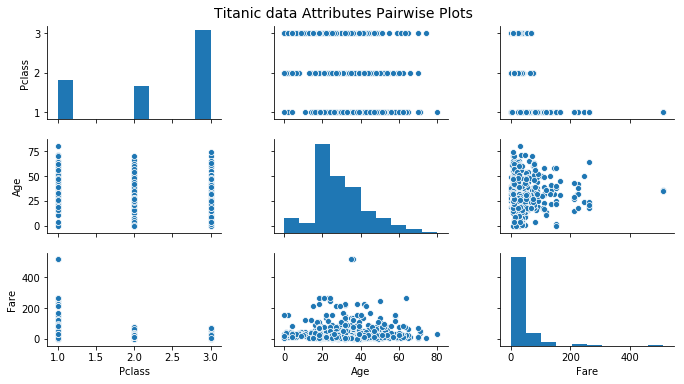

In [11]:
# Plot a scatter map between Pclass, Age and Fare
# Pair-wise Scatter Plots
cols = ['Pclass','Age','Fare']
pp = sns.pairplot(df_train1[cols], height=1.8, aspect=1.8)

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Titanic data Attributes Pairwise Plots', fontsize=14)

In [15]:
X = df_train1.iloc[:,:-1].values # Gettig the feature matrix
y = df_train1.iloc[:,-1].values # Getting the target matrix
print("Feature Matrix:\n",X,"\nTarget Matrix:\n",y)
print("Shape of X: ",X.shape,"\nShape of y: ",y.shape)

Feature Matrix:
 [[  1.   3.   1. ...   6.   3.   2.]
 [  2.   1.   0. ...   7.   1.   2.]
 [  3.   3.   0. ...   4.   3.   1.]
 ...
 [889.   3.   0. ...   4.   3.   4.]
 [890.   1.   1. ...   6.   1.   1.]
 [891.   3.   1. ...   6.   2.   1.]] 
Target Matrix:
 [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 

#### TO BE CONTINUED!